In [5]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [6]:
train_df=pd.read_csv("cleaned_data")

In [7]:
train_df.shape

(617, 58)

In [8]:
train_df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [9]:
X=train_df.iloc[:,1:57]

In [10]:
X.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')

In [11]:
y=train_df.iloc[:,57]

In [12]:
y

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: Class, Length: 617, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [16]:
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(X_train, y_train)
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9354838709677419


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       101
           1       0.94      0.70      0.80        23

    accuracy                           0.94       124
   macro avg       0.94      0.84      0.88       124
weighted avg       0.94      0.94      0.93       124

Confusion Matrix:
[[100   1]
 [  7  16]]


The model achieved an accuracy of 95% on the test set, with high precision, recall, and F1-scores for class 0. However, the model had a lower recall for class 1, indicating that it may have difficulty correctly identifying instances of class 1 compared to class 0.

In [20]:
model.feature_importances_


array([0.03120673, 0.02201691, 0.00685748, 0.01498782, 0.00793461,
       0.0136175 , 0.00485383, 0.00873714, 0.03102135, 0.00947913,
       0.01245819, 0.01233135, 0.03347922, 0.01358472, 0.00327582,
       0.00873563, 0.01956587, 0.00849774, 0.01226074, 0.00792198,
       0.00502568, 0.0425484 , 0.01051933, 0.01138346, 0.00841008,
       0.05544395, 0.02341079, 0.00700699, 0.01274973, 0.04926558,
       0.0151219 , 0.01626677, 0.09711614, 0.00410735, 0.01430298,
       0.00953241, 0.02139357, 0.01137288, 0.02879235, 0.00062187,
       0.0100089 , 0.00846269, 0.00822663, 0.01364732, 0.02654397,
       0.01513052, 0.01120533, 0.05071377, 0.03848334, 0.00542331,
       0.01394199, 0.00596761, 0.01313645, 0.01002091, 0.00530222,
       0.03656907])

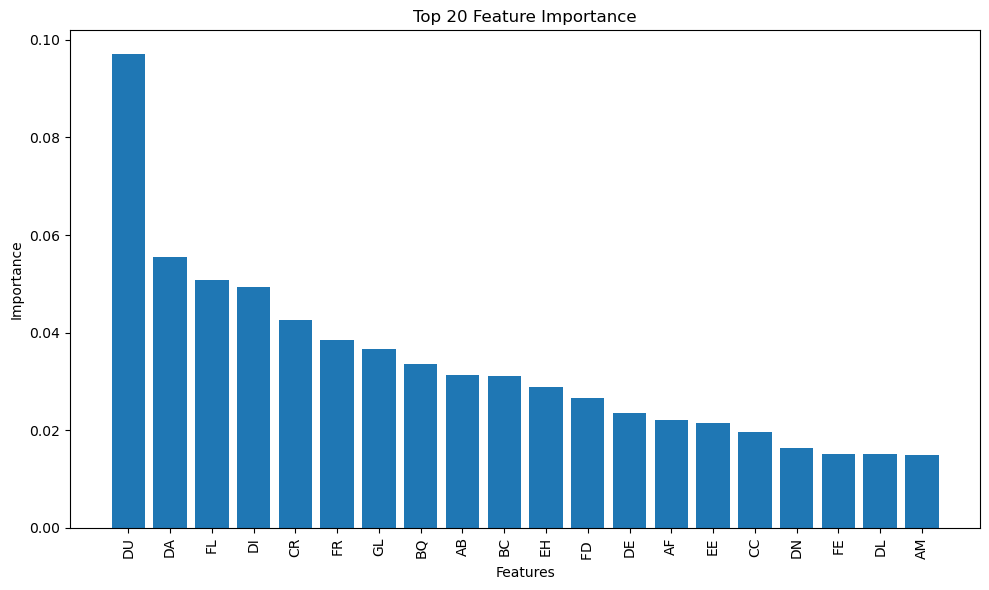

In [21]:
# Get the feature importances.
importances = model.feature_importances_

# Get the indices of the top 20 features.
top_indices = importances.argsort()[::-1][:20]

# Get the names of the top 20 features.
top_feature_names = X.columns[top_indices]

# Get the importances of the top 20 features.
top_importances = importances[top_indices]

plt.figure(figsize = (10, 6))
plt.bar(range(len(top_feature_names)), top_importances)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

In [22]:
test_df=pd.read_csv("test.csv")

In [23]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
test_df.isnull().sum().any()

False

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5 non-null      object 
 1   AB      5 non-null      float64
 2   AF      5 non-null      float64
 3   AH      5 non-null      float64
 4   AM      5 non-null      float64
 5   AR      5 non-null      float64
 6   AX      5 non-null      float64
 7   AY      5 non-null      float64
 8   AZ      5 non-null      float64
 9   BC      5 non-null      float64
 10  BD      5 non-null      float64
 11  BN      5 non-null      float64
 12  BP      5 non-null      float64
 13  BQ      5 non-null      float64
 14  BR      5 non-null      float64
 15  BZ      5 non-null      float64
 16  CB      5 non-null      float64
 17  CC      5 non-null      float64
 18  CD      5 non-null      float64
 19  CF      5 non-null      float64
 20  CH      5 non-null      float64
 21  CL      5 non-null      float64
 22  CR    

In [26]:
test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})

In [27]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X = test_df.drop(columns=['Id'],axis=0)
final_prediction = model.predict(X)
preds = model.predict_proba(X)
preds

array([[0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44]])

In [29]:
final_test = pd.DataFrame({'Id' : test_df['Id'], "class_0" : preds[:, 0], "class_1" : preds[:, 1] })
final_test

,Id,class_0,class_1
0,00eed32682bb,0.56,0.44
1,010ebe33f668,0.56,0.44
2,02fa521e1838,0.56,0.44
3,040e15f562a2,0.56,0.44
4,046e85c7cc7f,0.56,0.44


In [30]:
from xgboost import XGBClassifier

In [31]:
model_xgb = XGBClassifier()

In [32]:
model_xgb.fit(X_train, y_train)
print('Accuracy:', model_xgb.score(X_test, y_test))

Accuracy: 0.967741935483871


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_xgb.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           1       1.00      0.83      0.90        23

    accuracy                           0.97       124
   macro avg       0.98      0.91      0.94       124
weighted avg       0.97      0.97      0.97       124

Confusion Matrix:
[[101   0]
 [  4  19]]


In [36]:
model_xgb.feature_importances_


array([0.0257049 , 0.01357052, 0.01372653, 0.01555053, 0.        ,
       0.01616518, 0.01333127, 0.        , 0.05865046, 0.00478803,
       0.00096412, 0.0038201 , 0.02101651, 0.00212744, 0.        ,
       0.01250201, 0.00737103, 0.01628958, 0.04857958, 0.00215034,
       0.00628814, 0.02149024, 0.00549147, 0.00966878, 0.00261272,
       0.04609469, 0.01102763, 0.02894717, 0.03079027, 0.06764248,
       0.01347103, 0.01079991, 0.09113887, 0.        , 0.03858611,
       0.01366871, 0.03519082, 0.02927881, 0.03426265, 0.        ,
       0.00350368, 0.01662587, 0.00337078, 0.00363887, 0.03401093,
       0.03819956, 0.0206553 , 0.00687309, 0.02498901, 0.00148741,
       0.01077432, 0.00136855, 0.00325824, 0.0068475 , 0.02043048,
       0.0312078 ], dtype=float32)

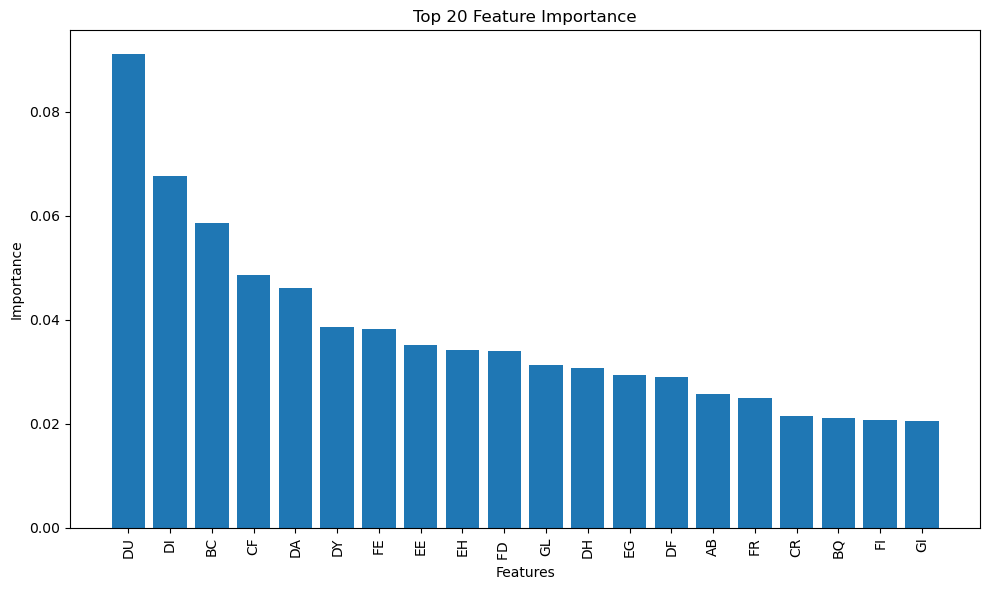

In [37]:
# Get the feature importances.
importances = model_xgb.feature_importances_

# Get the indices of the top 20 features.
top_indices = importances.argsort()[::-1][:20]

# Get the names of the top 20 features.
top_feature_names = X.columns[top_indices]

# Get the importances of the top 20 features.
top_importances = importances[top_indices]

plt.figure(figsize = (10, 6))
plt.bar(range(len(top_feature_names)), top_importances)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import KFold
